In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from math import log

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# PART A

`Sampling from the standard normal distribution, independently generate 500 observations for 101 variables. Call the first of these variables the response variable Y and the other variables the predictors X1;X2;...;X100. Perform a linear least-squares regression of Y on X1;X2;...;X100. Are any of the individual regression coefficients ‘‘statistically significant’’? Is the omnibus F-statistic for the regression ‘‘statistically significant’’? Is this what you expected to observe? (Hint: What are the ‘‘true’’ values of the regression coefficients β1;β2;...;β100?)`

In [2]:
#Generate the data, which is a 500x101 matrix with each having data from ~N(0,1) for each row
arr = np.random.normal(0, 1, size=(500, 101))
data = pd.DataFrame(arr)
display(data)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-1.462438,1.249499,-0.854919,-0.156918,1.243443,-1.299536,-0.046793,1.623889,0.210216,0.686175,...,-0.633980,0.384545,-0.254027,-0.965206,-0.711263,-1.616579,-1.079203,1.518865,0.951945,-0.433185
1,0.173195,-0.864177,-0.840873,-0.365763,-0.065291,0.482392,-1.027042,-0.366683,-1.000319,0.212296,...,-0.055218,1.102226,-1.787366,1.111214,0.034570,0.370114,0.360313,-1.418004,0.229284,-2.196471
2,0.190787,1.456419,-1.951259,0.300122,-0.195449,-0.452137,-0.022438,-0.568317,-0.809723,1.368912,...,0.235538,-1.307140,0.897892,0.505982,-2.019726,-1.028541,-0.438110,0.015779,1.473614,1.213371
3,0.968708,-1.140163,1.502828,-1.043068,-1.131375,0.553749,-0.630414,0.624702,0.438316,0.562938,...,1.969043,0.243171,1.106980,-0.561127,0.832050,-0.888232,1.560001,-0.600662,0.341168,0.644471
4,0.016130,-0.649337,0.378621,-0.819794,-1.247142,0.901642,-0.475260,-2.096256,0.141616,0.245696,...,1.308003,1.689333,1.558682,-0.882625,1.496182,-2.411403,-0.596461,0.117853,-1.734250,0.468550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.564076,-1.829863,1.077071,1.545839,0.040963,-0.477449,0.138563,-1.048737,0.078724,0.487980,...,0.673519,0.279926,0.837161,-0.566015,-0.436590,-1.279096,-1.106594,-0.419741,1.302827,1.112291
496,-0.557576,-1.362494,-0.267444,1.297564,0.104944,-0.677416,2.676790,-0.179809,1.584800,-0.036809,...,-1.831816,1.058493,0.336551,0.983894,0.617846,-0.387183,-0.032541,0.780457,-1.853994,-1.408086
497,-0.921775,0.608079,-0.481006,-0.054649,0.598365,-0.518268,-0.685783,0.558615,2.207591,-1.569929,...,0.273121,-0.359258,1.236156,-0.445148,-0.155735,-1.140359,0.545758,-1.856937,1.425301,-2.343111
498,0.244553,-1.233810,0.207088,-0.340393,0.048040,0.959811,-1.114824,0.912383,0.031456,1.161339,...,1.711606,-0.296404,0.097662,-0.926645,2.123785,-0.846994,0.230518,-1.454774,1.175853,-0.833761


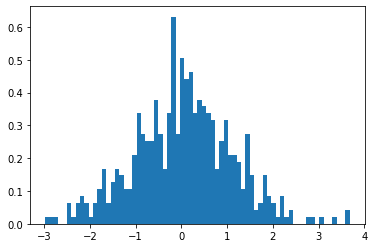

In [3]:
#Does the 1st column look Normal?
plt.hist(data.iloc[:,0], bins=70, density=True)
plt.show()

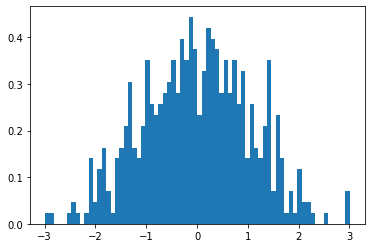

In [4]:
#2nd column
plt.hist(data.iloc[:,1], bins=70, density=True)
plt.show()

`Call the first of these variables the response variable Y and the other variables the predictors X1;X2;...;X100. Perform a linear least-squares regression of Y on X1;X2;...;X100.`

In [5]:
#response variable will be he first column
y = data[0]
#x1-x100 explanatory variables
X = data.iloc[:, 1:]

#Apply scikitLearn's Linear Regression function
Reg1 = LinearRegression().fit(X, y)
#Call the Array of Coefficients we called from the above function 
coefs = Reg1.coef_
#Calculate the intercept for the Regression
intercept = Reg1.intercept_
#ensure that there are 100 coefficients for our regression + 1 intercept to acocunt for 101 columns/variables
len(coefs) #verify we have 100 coefficients for our regression line

100

In [6]:
print(coefs)
print('')
print(intercept)

[ 0.01333293  0.00049237 -0.04643279  0.01255026  0.11868308  0.01745557
 -0.0399769   0.11335041  0.00959495  0.01696245 -0.01389303 -0.040371
 -0.08733068 -0.08740634  0.0364788   0.0284914  -0.09122998  0.13461365
 -0.01145294  0.03561219  0.06241574  0.02255288  0.04826005  0.08939496
 -0.07536497  0.05331776  0.00143677 -0.02690765  0.04549763 -0.01837777
  0.05645788 -0.06093207 -0.00992787  0.0104681  -0.12902163  0.00213122
  0.00507771 -0.01946293  0.02056683 -0.01406745  0.01997488  0.01247469
  0.01747016 -0.10571717  0.05493484 -0.02616372 -0.01185346 -0.00534009
  0.05657466  0.00117198 -0.07759684 -0.01604952  0.11489481  0.00162874
 -0.0113768  -0.01818944  0.0271307   0.01342993  0.05879948 -0.04547849
  0.09022874  0.05465338 -0.0883023  -0.00497107 -0.02977133 -0.06356518
 -0.07951857  0.05049459 -0.06447298 -0.01170047  0.04666677 -0.01943209
 -0.04037808  0.09430443 -0.01738677  0.09817995 -0.00399811  0.0957549
 -0.01844015  0.08171167  0.00813948  0.01473943 -0.11

`Are any of the individual regression coefficients ‘‘statistically significant’’?`

In [7]:
#To answer this question, we must first calculate the p-Value for each explanatory variable

#First we calculate T-scores based on formula as an array
t_scores = coefs/(np.std(X)/np.sqrt(500))
#Now use the scipy.stats.t.sf method to get p-values
p_values = scipy.stats.t.sf(np.abs(t_scores), df=500)*2
p_values

array([0.77704825, 0.99083342, 0.27102499, 0.78693848, 0.00793823,
       0.69907788, 0.37013477, 0.00892089, 0.82715703, 0.71422014,
       0.76929806, 0.36100964, 0.05085182, 0.06041016, 0.40865121,
       0.53847727, 0.05928927, 0.00257312, 0.79957986, 0.39866611,
       0.14449203, 0.60079536, 0.29533765, 0.02603798, 0.08725982,
       0.21996232, 0.97553339, 0.55158046, 0.29932893, 0.69052341,
       0.225405  , 0.14637464, 0.82552384, 0.81947607, 0.00342529,
       0.95933844, 0.9075658 , 0.66351399, 0.64532842, 0.75089208,
       0.62592146, 0.79761981, 0.70009107, 0.01912297, 0.20967597,
       0.5468643 , 0.7954473 , 0.90240793, 0.19246485, 0.97774293,
       0.08589381, 0.72099908, 0.0116605 , 0.97288802, 0.79152493,
       0.69618462, 0.55039306, 0.75787695, 0.19129195, 0.29577114,
       0.04405617, 0.2097376 , 0.04576617, 0.91260984, 0.50982765,
       0.1480692 , 0.08727037, 0.24400364, 0.14867715, 0.7894453 ,
       0.28038941, 0.66419595, 0.35128515, 0.04368865, 0.71639

In [8]:
'''Now we determine if any of the above entries are below the 5% significance level to reject
the null hypothesis for our coefficients'''

alpha = 0.05
index = 0
n_index = []
for i in p_values:
    index+=1
    # if in the reject zone
    if i < alpha:
        n_index.append(index)
print(n_index)
print('')

#Print these p_values that are statistically significant
for j in n_index:
    print(p_values[j-1])

[5, 8, 18, 24, 35, 44, 53, 61, 63, 74, 76, 78, 83, 93]

0.007938231680512164
0.008920894140401647
0.0025731160770666364
0.026037979632494594
0.003425292744851636
0.019122971853910577
0.011660500759653199
0.044056166550253205
0.04576616744340905
0.04368864670953445
0.033759560304500044
0.03071101332633917
0.008197067498248351
0.028232408402401717


`Is the omnibus F-statistic for the regression ‘‘statistically significant’’? Is this what you expected to observe? (Hint: What are the ‘‘true’’ values of the regression coefficients β1;β2;...;β100?)`

In [9]:
'''To determine the p_value for the F-statistic we first calculate it then determine if it is less than
the 5% significance level. To get the F-statistic we need to calculate the R^2'''

y_hat = Reg1.predict(X) #can our regression predict X?
y_mean = np.mean(y)
RSS = sum((y-y_hat)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
R2 = RegSS/TSS 

F_statistic_a = (R2/100)/((1-R2)/(399))
print('The F-Statistic for this data is = {}'.format(F_statistic_a))
print('')
p_value_f_stat_a = 1 - scipy.stats.f.cdf(F_statistic_a,100,400)
print('The p-value for the F-Statistic is = {}'.format(p_value_f_stat_a))

The F-Statistic for this data is = 1.1391748281640006

The p-value for the F-Statistic is = 0.19340917074425557


Since the p-values is way above the 5% threshold, the F-statistic for this data is not significant. We would in fact accept the Null hypothesis. This is not what I would expect since the values of the coefficients are not all =0 but it doesnt surprise me because the Standard Normal distribution usually has alot of interesting properities

# PART B

`Retain the three predictors in part (a) that have the largest absolute t-values, regressing Y only on these variables. Are the individual coefficients ‘‘statistically significant’’? What about the omnibus F? What happens to the p-values compared to part (a)?`

In [10]:
#Highlight top 3 values in t-scores list list 
t_scores

1      0.283321
2      0.011495
3     -1.101924
4      0.270433
5      2.665408
         ...   
96    -0.568290
97    -1.138764
98    -0.783738
99     1.092109
100    0.289089
Length: 100, dtype: float64

In [11]:
top3_tscores = abs(t_scores).sort_values(ascending=False).index[:3]
print(top3_tscores)
print('')
top3tvalues = t_scores[top3_tscores]
print(top3tvalues)
print('')
x2 = X[top3_tscores]
print(x2)

Int64Index([18, 35, 5], dtype='int64')

18    3.029884
35   -2.940806
5     2.665408
dtype: float64

           18        35        5 
0   -0.846473 -0.307555 -1.299536
1    1.476585  0.616042  0.482392
2   -0.622645 -1.445672 -0.452137
3    0.400749 -0.295170  0.553749
4   -2.078175 -0.357174  0.901642
..        ...       ...       ...
495 -0.531491 -0.901827 -0.477449
496 -0.984987  1.414630 -0.677416
497  0.419495  1.587792 -0.518268
498  1.311165 -0.909095  0.959811
499  0.507849 -1.944145 -0.492318

[500 rows x 3 columns]


`regressing Y only on these variables.`

In [12]:
#Now we run another Regression using the same procedure as above but with only a df of the 3 cols marked as x2
reg2 = LinearRegression().fit(x2, y) #our y column is the same as our original y for 1st experiment
coefs2 = reg2.coef_
intercept2 = reg2.intercept_

print(coefs2)
print('')
print(intercept2)

[ 0.12445447 -0.11684056  0.0717708 ]

0.04381792854695335


`Are the individual coefficients ‘‘statistically significant’’?`

In [13]:
#To answer this we need new t-scores to find the p-Values for the coefficients obtained
t_scores2 = coefs2 / (np.std(x2)/np.sqrt(500))
p_values2 = scipy.stats.t.sf(np.abs(t_scores2), df=500)*2
p_values2

array([0.00528824, 0.00799067, 0.10762718])

The p-values of each of the coefficients we have obtained show that the first 2 are below the 5% threshold and such are statistically significant. 

`What about the omnibus F? What happens to the p-values compared to part (a)?`

In [14]:
y_hat = reg2.predict(x2) #can our regression predict X?
y_mean = np.mean(y)
RSS = sum((y-y_hat)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
R2 = RegSS/TSS 

F_statistic_b = (R2/3)/((1-R2)/(496))
print('The F-Statistic for this data is = {}'.format(F_statistic_b))
print('')
p_value_f_stat_b = 1 - scipy.stats.f.cdf(F_statistic_b,3,497)
print('The p-value for the F-Statistic is = {}'.format(p_value_f_stat_b))

The F-Statistic for this data is = 4.996963590451705

The p-value for the F-Statistic is = 0.002010797206169812


In [30]:
print('The F-statistic for part A= {} vs part C= {}'.format(F_statistic_a,F_statistic_b))
print('\nThe p-value for the F-statistic of part A= {} vs part C= {}'.format(p_value_f_stat_a,p_value_f_stat_b))

The F-statistic for part A= 1.1391748281640006 vs part C= 4.996963590451705

The p-value for the F-statistic of part A= 0.19340917074425557 vs part C= 0.002010797206169812


Now we observe that the F-Statistic is ~5 with a p-value below the 5% threshold, thus, the F-statistic is significantly significant and we reject the null hypothesis. 

# PART C

`Using any method of variable selection (stepwise regression or subset regression with any criterion), find the ‘‘best’’ model with three explanatory variables. Obtain the individual t-statistics and omnibus F for this model. How do these tests compare to those in part (a)?`

In [15]:
'''First we create a function for the Forward variable selection obtained at
https://www.datasklr.com/ols-least-squares-regression/variable-selection '''

def forward_var_selection(x, y, threshold_in):
    initial_list = []
    best_pvalues = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(dtype='float64',index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            best_pvalues.append(best_pval) 
            changed=True
        if not changed:
            break
    return included, best_pvalues

In [16]:
#Apply the above Forward variable selection to our initial data 

X = data.iloc[:, 1:]
y = data[0]
best_expl_variables, best_pvalues = forward_var_selection(X, y, 0.05)
print(best_expl_variables)
print('')
print(best_pvalues)

[44, 83, 35, 18, 53]

[0.00428503197962777, 0.009237603352237186, 0.014222822981944059, 0.012131844976330547, 0.019637144374317128]


In [17]:
#Find the top 3 explanatory variables 
top3_explvar = [i for _, i in sorted(zip(best_pvalues,best_expl_variables))][:3]
print(top3_explvar)

[44, 83, 18]


`Obtain the individual t-statistics and omnibus F for this model.`

In [18]:
x3 = data[top3_explvar]
y = data[0]
reg3 = LinearRegression().fit(x3, y)
coefs3 = reg3.coef_
intercept3 = reg3.intercept_
t_scores3 = coefs3/(np.std(x3)/np.sqrt(500))
p_values3 = scipy.stats.t.sf(np.abs(t_scores3), df=500)*2

print(coefs3) # 3 coefficients for each predictors
print('')
print(intercept3)
print('')
print(p_values3)

[-0.1291325  -0.12299774  0.11676604]

0.05374555707485369

[0.0042597  0.00592506 0.00884849]


In [19]:
y_hat = reg3.predict(x3) #can our regression predict X3?
y_mean = np.mean(y)
RSS = sum((y-y_hat)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
R2 = RegSS/TSS 

print(t_scores3)
print('')
F_statistic_c = (R2/3) / ((1-R2)/(496))
print('The F-Statistic for this data is = {}'.format(F_statistic_c))
print('')
p_value_f_stat_c = 1 - scipy.stats.f.cdf(F_statistic_c,3,497)
print('The p-value for the F-Statistic is = {}'.format(p_value_f_stat_c))

44   -2.871422
83   -2.763743
18    2.628170
dtype: float64

The F-Statistic for this data is = 7.114598051316336

The p-value for the F-Statistic is = 0.00010942657426105118


`How do these tests compare to those in part (a)`

In [20]:
print('The F-statistic for part A= {} vs part C= {}'.format(F_statistic_a,F_statistic_c))
print('\nThe p-value for the F-statistic of part A= {} vs part C= {}'.format(p_value_f_stat_a,p_value_f_stat_c))

The F-statistic for part A= 1.1391748281640006 vs part C= 7.114598051316336

The p-value for the F-statistic of part A= 0.19340917074425557 vs part C= 0.00010942657426105118


This shows that the F-statistic for the forward variable selection is statistically significant but for part A, it is not.

# PART D

`Using the methods of model selection discussed in this chapter, find the ‘‘best’’ model for these data. How does that model compare to the true model that generated the data?`

In [21]:
"""Draft functions to apply the Akaile Information Selection (AIC) Model Selection. This code snipit is 
taken from https://machinelearningmastery.com/probabilistic-model-selection-measures/ section on AIC.
AIC works by evaluating the model’s fit on the training data, and adding a penalty term for the complexity 
of the model (similar fundamentals to regularization). The desired result is to find the lowest possible
AIC, which indicates the best balance of model fit with generalizability."""

#Model 1: Part A
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic
 
y = data[0]
X = data.iloc[:, 1:]
reg4 = LinearRegression().fit(X, y)
num_params = len(reg4.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = reg4.predict(X)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 101
MSE: 0.895
AIC: 146.526


In [22]:
#Model 2, Part B
reg5 = LinearRegression().fit(x2, y)
num_params = len(reg5.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = reg5.predict(x2)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 4
MSE: 1.117
AIC: 63.215


In [23]:
#Model 3, Part C
reg6 = LinearRegression().fit(x3, y)
num_params = len(reg6.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = reg6.predict(x3)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)

Number of parameters: 4
MSE: 1.103
AIC: 57.037


In [24]:
#Calculate BIC for Model 1, Part A Linear Regression
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic
 
y = data[0]
X = data.iloc[:, 1:]
reg7 = LinearRegression().fit(X, y)
num_params = len(reg7.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = reg7.predict(X)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 101
MSE: 0.895
BIC: 572.201


In [25]:
#Part B
reg8 = LinearRegression().fit(x2, y)
num_params = len(reg8.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = reg8.predict(x2)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 4
MSE: 1.117
BIC: 80.073


In [26]:
#Part C
reg9 = LinearRegression().fit(x3, y)
num_params = len(reg9.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = reg9.predict(x3)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 4
MSE: 1.103
BIC: 73.895


We want to have a lower AIC and BIC score.

# PART E

`Validation: Generate a new set of 500 observations as in part (a), and use that new data set to validate the models that you selected in parts (b), (c), and (d). What do you conclude?`

In [27]:
arr2 = np.random.normal(0, 1, size=(500, 101))
data2 = pd.DataFrame(arr2)
display(data2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.051992,0.899764,0.589070,0.261109,-0.666773,-0.104549,0.506363,1.225550,0.777034,0.030659,...,0.550585,1.382150,-2.118320,-0.889672,-0.607861,-0.153339,0.750018,-0.266946,0.172416,0.226511
1,0.548305,0.466000,-0.229710,0.089315,1.410368,0.217488,0.345870,0.296255,-1.034479,0.735787,...,0.345107,1.245537,0.566385,-0.511872,0.741763,0.440613,1.737936,0.393390,0.094591,1.074160
2,-1.780616,-0.551527,-1.994074,1.913004,-0.743202,0.313345,0.338675,0.060938,-0.590702,0.565335,...,-0.988265,-2.239318,-0.019485,1.376795,1.245656,1.310724,-0.617499,0.007686,0.402856,-0.926268
3,-0.542025,-1.404280,-0.114562,0.777305,0.784420,1.483142,0.151873,-1.042084,-0.793184,0.062786,...,1.756568,1.647429,-1.451927,0.052422,-2.024718,0.142019,-0.517535,0.709141,0.772074,-1.101387
4,0.610526,-1.264492,-0.830053,-1.410610,1.023379,0.159876,-0.471192,-0.708406,-1.451398,-0.974284,...,0.307873,-0.430515,2.085424,1.646550,0.627264,0.978643,0.484822,0.330350,-1.020259,0.285352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.587863,-0.727626,1.280593,-1.466898,0.513573,-0.848437,1.358403,1.722591,1.365443,1.275658,...,0.707980,1.113306,1.246727,0.643577,0.487650,-0.232476,-1.472751,-1.835942,1.705611,-0.952521
496,-0.358722,1.485203,-0.360121,0.320817,-0.124765,0.261956,0.120995,1.446888,-1.039337,-0.971614,...,-1.481245,-0.638567,0.541925,-0.733734,-0.175477,-2.018436,-0.660938,-0.180823,0.741476,0.337785
497,0.180030,-1.329998,0.142811,-1.972297,-0.487808,1.182503,0.180282,1.425742,0.583114,2.451730,...,2.360226,0.871831,0.665856,-1.496330,-0.600331,-1.358570,0.718267,-1.838843,0.170791,-1.627576
498,0.814214,-0.390716,1.316339,1.426041,-0.317919,0.377338,-1.584713,0.486882,0.856261,-0.697047,...,0.824064,1.478910,-0.632329,0.588199,0.346138,-0.357904,0.465383,-1.304417,-0.474953,-0.416133


In [28]:
lr = LinearRegression()

#Part B
X_train_b = data[top3_tscores]
y_train_b = data[0]
X_test_b = data2[top3_tscores]
y_test_b = data2[0]
lr.fit(X_train_b, y_train_b)
score = cross_val_score(lr, X_test_b, y_test_b, cv=5)
print("Cross Validation Score of method in Part B = ", score.mean())

#Part C
X_train_c = data[top3_explvar]
y_train_c = data[0]
X_test_c = data2[top3_explvar]
y_test_c = data2[0]
lr.fit(X_train_c, y_train_c)
score = cross_val_score(lr, X_test_c, y_test_c, cv=5)
print("Cross Validation Score of method in Part C = ", score.mean())

Cross Validation Score of method in Part B =  -0.009328681246458715
Cross Validation Score of method in Part C =  -0.01435957016381011
